In [1]:
import torch
import torch.nn as nn
import torch.autograd as autograd

from modules.pinn import *

import matplotlib.pyplot as plt


In [2]:
def make_tensor(x):
    return torch.tensor(x).unsqueeze(0).T.type(torch.FloatTensor).cuda()

<All keys matched successfully>

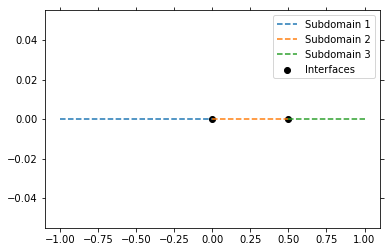

In [3]:
fpath = './models/prob3.data'
state_dict = torch.load(fpath)

points = [-1.0,0.0, 0.5,1.0]
domain_no = len(points) - 1
global_lb = -1.0
global_rb = 1.0

figure_path = "./figures/"

model = CPINN(domain_no, global_lb, global_rb, figure_path)

sample = {'Model{}'.format(i+1): PINN(i).cuda() for i in range(domain_no)}
# points = [-1.0, 0.0, 1.0]
model.module_update(sample)
model.make_domains(points)
model.make_boundaries(points)
model.plot_domains()

model.load_state_dict(state_dict)

In [45]:
plots = np.arange(-1.0, 1.0, 0.001)
dw = 0.00001

# plots = np.arange(-0.01, 0.01, dw) - 0.5 
points_tensor = make_tensor(plots)


# plots

In [46]:
output = model(points_tensor)


In [47]:
fname = "./data/prob2.txt"
data = np.loadtxt(fname=fname)

x, y, u = data.T

In [42]:
fpath = './models/cpinn_1D_10.data'
state_dict = torch.load(fpath)

points = [-1.0,  1.0]
domain_no = len(points) - 1
global_lb = -1.0
global_rb = 1.0

figure_path = None

model = CPINN(domain_no, global_lb, global_rb, figure_path)

sample = {'Model{}'.format(i+1): PINN(i).cuda() for i in range(domain_no)}
# points = [-1.0, 0.0, 1.0]
model.module_update(sample)
model.make_domains(points)
model.make_boundaries(points)

model.load_state_dict(state_dict)

output2 = model(points_tensor)

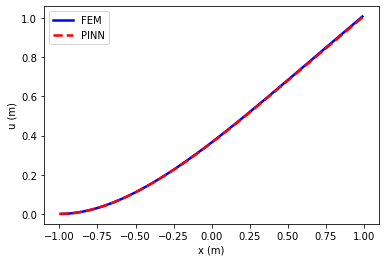

In [48]:

# plt.plot(plots, np.abs(output2.cpu().detach().numpy()),  'g', linewidth=2.5, label='PINN')
plt.plot(x, u, 'b', linewidth=2.5, label='FEM')
plt.plot(plots, np.abs(output.cpu().detach().numpy()), 'r--', linewidth=2.5, label='PINN')
plt.xlabel('x (m)')
plt.ylabel('u (m)')
plt.rc('font', size=10)
plt.legend()
plt.savefig('./figures/res2.svg')


<Figure size 432x288 with 0 Axes>

In [2]:
import numpy as np

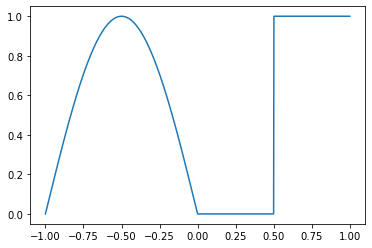

In [18]:
x_f_s = np.linspace(-1.0, 1.0, 1000)
x_f = torch.from_numpy(x_f_s).float()
zeros = torch.zeros(x_f.shape)
ones = torch.ones(x_f.shape)
res = torch.where(0 > x_f, ones * torch.sin(-np.pi * x_f), zeros) + torch.where(0.5 < x_f, ones, zeros)
plt.plot(x_f_s, res.cpu().detach().numpy())

In [109]:
logpath = "./figures/prob3/convergence_model{}.csv".format(2)

In [110]:
df = pd.read_csv(logpath)

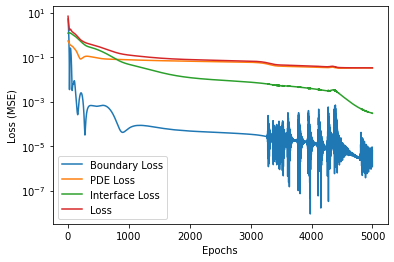

In [111]:
plt.plot(df['Loss_B'][:5000],label='Boundary Loss')
plt.plot(df['Loss_F'][:5000], label='PDE Loss')
plt.plot(df['Loss_I'][:5000], label='Interface Loss')
plt.plot(df['Loss'][:5000], label='Loss')
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.savefig('./figures/tra3_2.svg')

In [112]:
logpath = "./figures/prob3/convergence_model{}.csv".format(0)
df_0 = pd.read_csv(logpath)

In [113]:
logpath = "./figures/prob3/convergence_model{}.csv".format(1)
df_1 = pd.read_csv(logpath)

In [114]:
logpath = "./figures/prob3/convergence_model{}.csv".format(2)
df_2 = pd.read_csv(logpath)

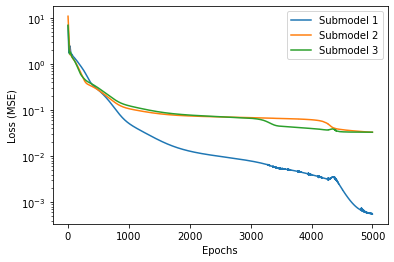

In [119]:
plt.plot(df_0['Loss'][:5000], label='Submodel 1')
plt.plot(df_1['Loss'][:5000], label='Submodel 2')
plt.plot(df_2['Loss'][:5000], label='Submodel 3')
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.savefig('./figures/tra3.svg')